<a href="https://colab.research.google.com/github/EricAndradeNJIT/data-analytics-folder/blob/main/Confussion_Matrix_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer.csv


In [34]:
#import packages

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


In [3]:
cancer = pd.read_csv('cancer.csv')

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [37]:
#split data into features of interest

cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

y = cancer[['cancer_present']]
X = cancer[['perimeter_mean']]

print(y)

     cancer_present
0               1.0
1               1.0
2               1.0
3               1.0
4               1.0
..              ...
564             1.0
565             1.0
566             1.0
567             1.0
568             0.0

[569 rows x 1 columns]


In [38]:
# split and prepare data

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

print(X_train_val)

     perimeter_mean
287           81.89
512           88.64
402           84.18
446          117.30
210          134.70
..              ...
71            58.79
106           75.17
270           90.30
435           91.12
102           77.22

[426 rows x 1 columns]


In [11]:
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#calculate accuracy

log_reg_model.score(X_train, y_train)

accuracy = log_reg_model.score(X_train, y_train)

accuracy

0.8908450704225352

In [13]:
#calculate prediction of tumors diagnosis

log_reg_model.predict_proba(X_train)

probs_ = log_reg_model.predict_proba(X_train)

probs = pd.DataFrame(probs_)

probs.head()

,0,1
0,0.878251,0.121749
1,0.183882,0.816118
2,0.986293,0.013707
3,0.540649,0.459351
4,0.000414,0.999586


In [42]:
#calculate class of tumor diagnosis

classes_ = log_reg_model.predict(X_train)

classes = pd.DataFrame(classes_)

print(classes.head)

print(classes.shape)

<bound method NDFrame.head of        0
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
..   ...
279  0.0
280  0.0
281  0.0
282  0.0
283  0.0

[284 rows x 1 columns]>
(284, 1)


In [44]:
print(X_train)

     perimeter_mean
143           83.74
375          106.30
166           68.77
38            95.54
272          147.30
..              ...
31            77.93
348           73.02
448           94.25
295           88.06
116           58.74

[284 rows x 1 columns]


In [46]:
#calculated confussion matrix

confusion_matrix(y_train, classes)

array([[165,  10],
       [ 21,  88]])

<Axes: >

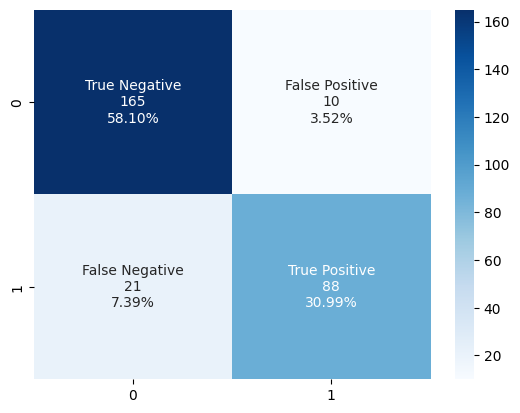

In [47]:
#implement heatmap using sns

matrix = confusion_matrix(y_train, classes)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

Classified correctly as benign: 165

Classified incorrectly as benign: 21

Classified incorrectly as malignant: 10

Classified correctly as malignant: 88

In [48]:
#calculate precision and recall

print(precision_score(y_train, classes))

print(recall_score(y_train, classes))

0.8979591836734694
0.8073394495412844


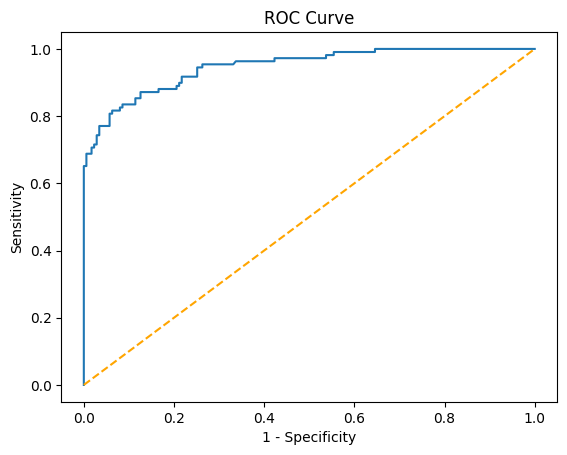

In [49]:
#graph ROC curve

fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])


fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)

plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.savefig("ROC.png")


In [21]:
#calculate area% under line
auc(fpr_, tpr_)

0.947391874180865